# Nota do ENEM x IDHM

Este tutorial ensina como juntar duas base de dados com pandas. As bases utilizadas são a média do enem, feita no último tutorial, e a base do IDHM do Atlas do Brasil.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mediaEnemPorMunicipio = pd.read_csv('MediaEnemPorMunicipio.csv', sep=',', index_col=0) #index _col=0 devido a existênciade uma coluna com índice na base em csv

In [4]:
mediaEnemPorMunicipio.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [9]:
atlasHumano = pd.read_csv('D:/ARQUIVOS/portfólio/atlas2010_dadosbrutos_idhm.csv', sep=';', encoding='UTF-8')

In [10]:
atlasHumano.head()

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,2010,11,110002,1100023,ARIQUEMES,0.702,0.600,0.806,0.716
2,2010,11,110003,1100031,CABIXI,0.650,0.559,0.757,0.650
3,2010,11,110004,1100049,CACOAL,0.718,0.620,0.821,0.727
4,2010,11,110005,1100056,CEREJEIRAS,0.692,0.602,0.799,0.688


IDHM E, L E R são Educação, Longevidade e Renda, respectivamente. Além disso, o código do município são iguais a do microdadados do enem porque são valores gerados pelo IBGE.

In [11]:
mediaEnemIDHM = pd.merge(mediaEnemPorMunicipio, atlasHumano, how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['Codmun7'])

In [12]:
mediaEnemIDHM.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2010.0,11.0,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,2010.0,11.0,110002.0,1100023.0,ARIQUEMES,0.702,0.600,0.806,0.716
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,2010.0,11.0,110003.0,1100031.0,CABIXI,0.650,0.559,0.757,0.650
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,2010.0,11.0,110004.0,1100049.0,CACOAL,0.718,0.620,0.821,0.727
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,2010.0,11.0,110005.0,1100056.0,CEREJEIRAS,0.692,0.602,0.799,0.688


### Observação

A Kizzy teve um problema com o a coluna IDHM que estava sendo interpretada como uma coluna de strings. Para solucionar ela usou a seguinte função:
```python
mediaEnemIDHM['IDHM'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
```
Analogamente, foi feito o mesmo para IDHM_R, IDHM_E e IDHM_L.

<AxesSubplot:xlabel='[NU_NOTA_MT]', ylabel='[IDHM]'>

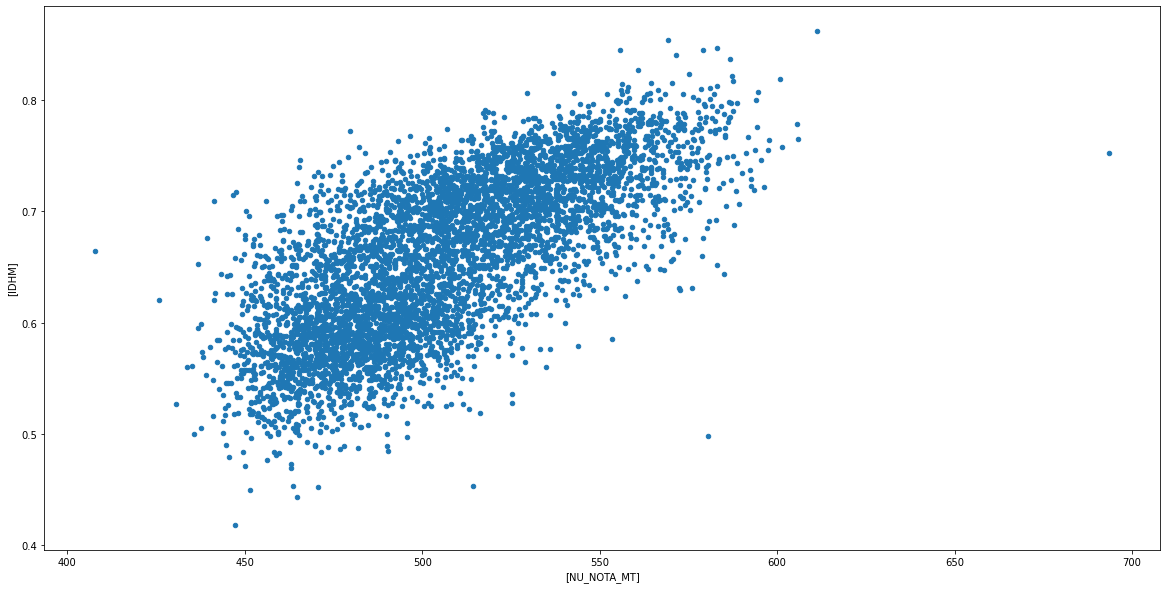

In [17]:
mediaEnemIDHM.plot.scatter(['NU_NOTA_MT'], ['IDHM'], figsize=(20,10))

<AxesSubplot:xlabel='[NU_NOTA_REDACAO]', ylabel='[IDHM]'>

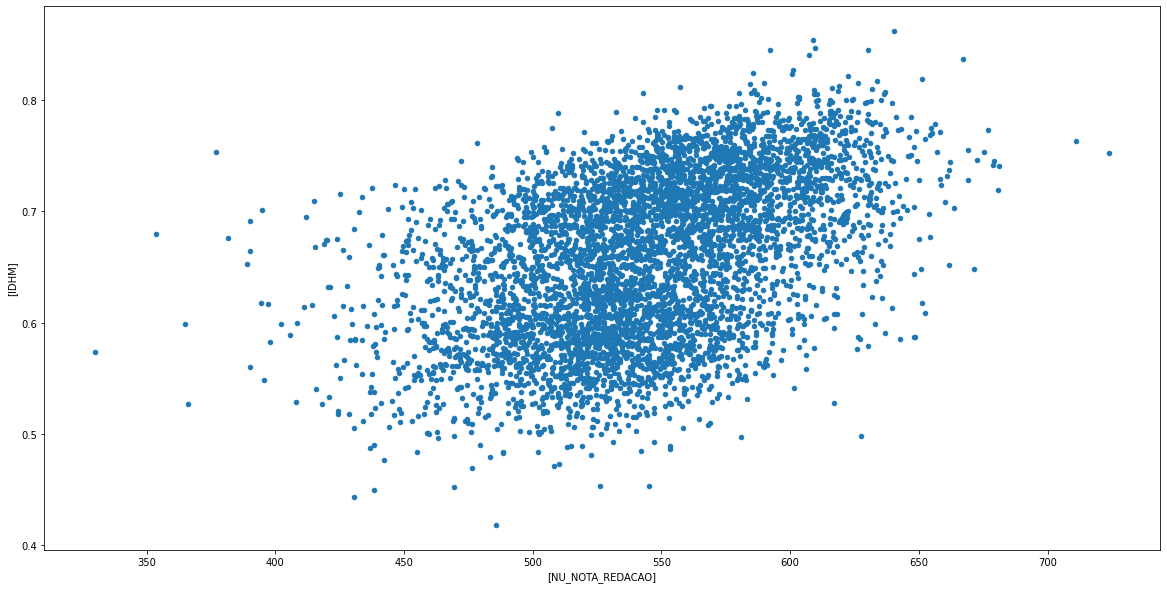

In [18]:
mediaEnemIDHM.plot.scatter(['NU_NOTA_REDACAO'], ['IDHM'], figsize=(20,10))

## Como fazer um gráfico com quatro quadrantes

In [22]:
mean_REDACAO = mediaEnemIDHM.NU_NOTA_REDACAO.mean()
mean_IDHM = mediaEnemIDHM.IDHM.mean()

In [23]:
print(mean_REDACAO)
print(mean_IDHM)

544.1045349735814
0.6591574123989219


<AxesSubplot:xlabel='[NU_NOTA_REDACAO]', ylabel='[IDHM]'>

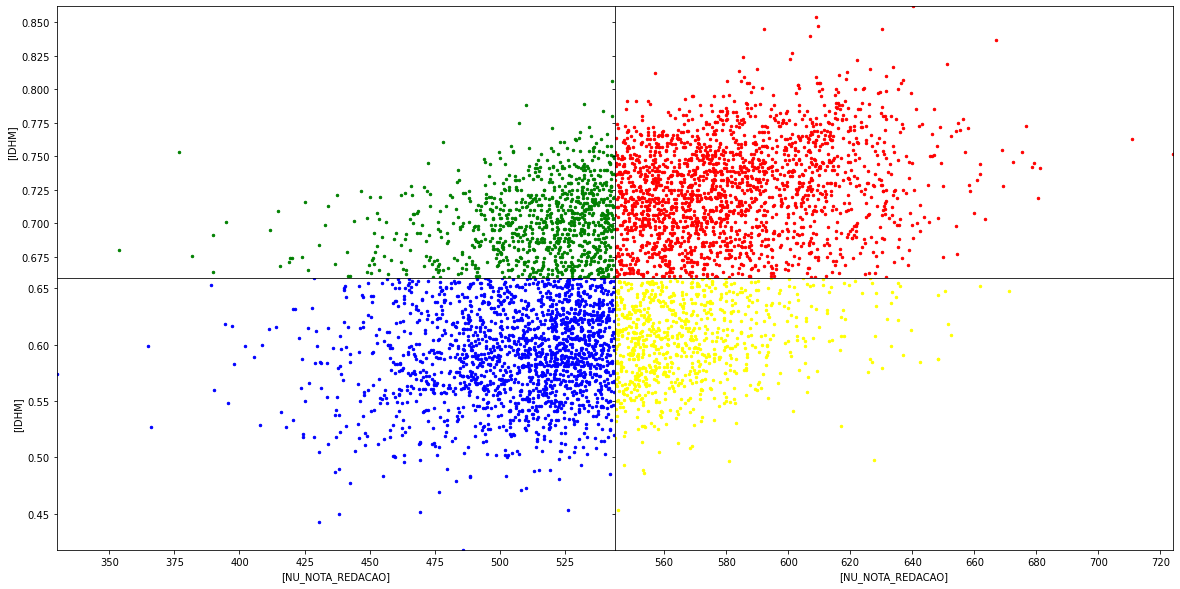

In [41]:
idhmMunicipio = mediaEnemIDHM.IDHM
notaMunicipio = mediaEnemIDHM.NU_NOTA_REDACAO

quadrante1 = (idhmMunicipio < mean_IDHM) & (notaMunicipio < mean_REDACAO)
quadrante2 = (idhmMunicipio > mean_IDHM) & (notaMunicipio < mean_REDACAO)
quadrante3 = (idhmMunicipio > mean_IDHM) & (notaMunicipio > mean_REDACAO)
quadrante4 = (idhmMunicipio < mean_IDHM) & (notaMunicipio > mean_REDACAO)

fig, ax = plt.subplots(2, 2, figsize=(20,10), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()


mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter(['NU_NOTA_REDACAO'], ['IDHM'], ax = ax [1, 0], s=6, color='blue', xlim = (minRedacao, mean_REDACAO), ylim=(minIDHM, mean_IDHM))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter(['NU_NOTA_REDACAO'], ['IDHM'], ax = ax [0, 0], s=6, color='green', xlim = (minRedacao, mean_REDACAO), ylim=(mean_IDHM, maxIDHM))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter(['NU_NOTA_REDACAO'], ['IDHM'], ax = ax [0, 1], s=6, color='red', xlim = (mean_REDACAO, maxRedacao), ylim=(mean_IDHM, maxIDHM))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter(['NU_NOTA_REDACAO'], ['IDHM'], ax = ax [1, 1], s=6, color='yellow', xlim = (mean_REDACAO, maxRedacao), ylim=(minIDHM, mean_IDHM))